In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
from matplotlib import colormaps as cm

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

In [2]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = mnist.data
y = mnist.target

model_KM = KMeans(100, random_state=42)
pred = model_KM.fit_predict(X)

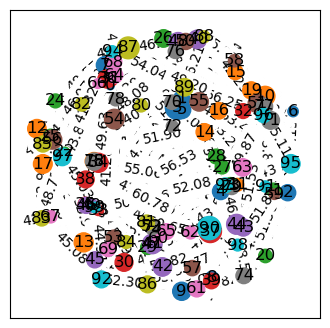

In [6]:
import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg

cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(pred), X=X, metric_clusters="average"
)
# Coloring the graph
cluster_g.color_graph(
    node_color_labels=pred,
    node_palette=cm.get_cmap("tab10"),
)

fig, ax = plt.subplots(figsize=(4, 4))
pg.draw_graph(cluster_g.Graph, ax=ax)

In [7]:
len(cluster_g.Graph.edges(data=True))

4950

In [8]:
cluster_g.prunedEdgesHistory

{'md_bf': {'all_pruned': False, 'edges': [], 'score': [], 'knn_g': -1},
 'md_ps': {'all_pruned': False, 'edges': [], 'score': [], 'knn_g': -1},
 'conn_bf': {'all_pruned': False, 'edges': [], 'score': []},
 'conn_ps': {'all_pruned': False, 'edges': [], 'score': []},
 'in_between_compo': {'edges': []},
 'conn_merged': {'all_pruned': False,
  'edges': [],
  'score': [],
  'k_compo': -1,
  'other_edges_remove': []}}

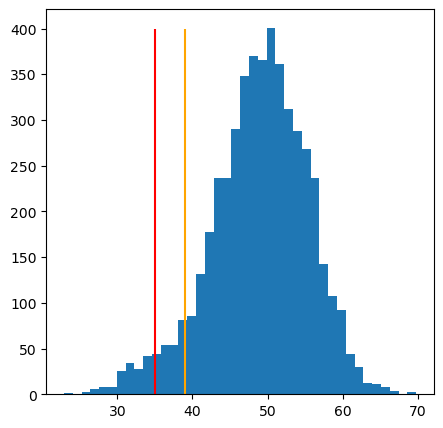

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist([d["weight"] for _, _, d in cluster_g.Graph.edges(data=True)], bins=40)
ax.vlines(x=35, ymin=0, ymax=400, color="red")
ax.vlines(x=39, ymin=0, ymax=400, color="orange")
plt.show()

In [ ]:
print(len(cluster_g.Graph.edges))

temp = cluster_g.Graph.copy()
temp.remove_edges_from(
    [(u, v) for u, v, d in cluster_g.Graph.edges(data=True) if d["weight"] > 35]
)
print(len(cluster_g.Graph.edges))
print(len(temp.edges))
print(len([a for a in nx.connected_components(temp)]))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
pg.draw_graph(temp, ax=ax)

### Pie chart

In [ ]:
cm.get_cmap("tab10")(2)

In [39]:
from matplotlib.colors import to_hex

cluster_color_dict = {i: to_hex(cm.get_cmap("tab10")(i)) for i in range(10)}

clusters_hexa = np.array([cluster_color_dict[c] for c in y])

import matplotlib.patches as mpatches

keys = list(cluster_color_dict)
patches = [mpatches.Patch(color=cluster_color_dict[k], label=k) for k in keys]

In [40]:
# Coloring the graph with the labels
cluster_g.color_graph(
    node_color_labels=clusters_hexa,  # here the labels already contain the colors
)

In [ ]:
print(len(cluster_g.Graph.edges))

temp = cluster_g.Graph.copy()
temp.remove_edges_from(
    [(u, v) for u, v, d in cluster_g.Graph.edges(data=True) if d["weight"] > 39]
)
print(len(cluster_g.Graph.edges))
print(len(temp.edges))
print(len([a for a in nx.connected_components(temp)]))

In [ ]:
fig, axs = plt.subplots(1, figsize=(10, 10))

pos = nx.spring_layout(
    temp, seed=42, iterations=80, scale=1, center=(0, 0), weight="spring"
)

nx.draw_networkx_edges(temp, pos=pos, ax=axs)

edge_labels = {
    (u, v): "{:.0f}".format(data["weight_plot"]) for u, v, data in temp.edges(data=True)
}
nx.draw_networkx_edge_labels(
    temp,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs,
)

xlim = axs.get_xlim()
ylim = axs.get_ylim()

for node, data in temp.nodes(data=True):

    attributes = temp.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs.pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.1, 0.01),
        frame=True,
    )


axs.legend(handles=patches, loc="upper left")

# axs.set_aspect("auto")
# xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
# axs.set_xlim(xlim)
# axs.set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))
plt.tight_layout()
plt.savefig("digits.png", dpi=200)

### bokeh

In [20]:
print(len(cluster_g.Graph.edges))

temp = cluster_g.Graph.copy()
temp.remove_edges_from(
    [(u, v) for u, v, d in cluster_g.Graph.edges(data=True) if d["weight"] > 39]
)
print(len(cluster_g.Graph.edges))
print(len(temp.edges))
print(len([a for a in nx.connected_components(temp)]))

4950
4950
371
1


In [25]:
import pyballmapper.plotting as bmplot
import bokeh
from bokeh.io import show

to_input = temp

partitions = bmplot.generate_partitions(
    {node: cluster_g.clusters[node] for node in range(len(cluster_g.clusters))},
    {i: v for i, v in enumerate(y)},
)

pie_plot = bmplot.pie_graph_plot(
    partitions,
    g=to_input,
    graph_layout=nx.spring_layout(to_input, iterations=1000, seed=43),
    node_scaling=True,
    plot_height=2000,
    plot_width=2000,
    palette=bokeh.palettes.d3["Category10"][10],
)

# save(pie_plot, 'pie_plot.html')

show(pie_plot)

In [ ]:
bokeh.palettes.d3["Category10"][10]

In [ ]:
colorscale_tab10 = [
    [
        i / 10,
        "rgb{}".format(
            tuple((round(f * 255) for f in cm.get_cmap("tab10")(i / 10)[:3]))
        ),
    ]
    for i in range(0, 11)
]
colorscale_tab10

In [59]:
import io
import sys
import base64
from PIL import Image
import copy

# Create images for a custom tooltip array
tooltip_s = []
for image_data in X:
    with io.BytesIO() as output:
        # big_array = (
        #     (zoom(image_data.reshape((3, 3)), 30, order=0) + 1) / 2 * 255
        # ).astype(np.uint8)
        # img = Image.fromarray(big_array)
        # img.save(output, "PNG")
        fig, ax = plt.subplots(figsize=(1, 1))
        ax.imshow(image_data.reshape((8, 8)), cmap="grey")
        ax.axis("off")
        plt.tight_layout()
        fig.savefig(
            output,
            bbox_inches="tight",
            pad_inches=0.01,
        )
        contents = copy.deepcopy(output.getvalue())
        img_encoded = base64.b64encode(contents)
        img_tag = """<img src="data:image/png;base64,{}">""".format(
            img_encoded.decode("utf-8")
        )
        tooltip_s.append(img_tag)
        plt.close()

tooltip_s = np.array(
    tooltip_s
)  # need to make sure to feed it as a NumPy array, not a list

In [ ]:
import kmapper as km
from collections import defaultdict

mapper = km.KeplerMapper(verbose=0)

graph = {}
graph["nodes"] = defaultdict(list)
for n, c in enumerate(cluster_g.clusters):
    graph["nodes"][n] = c

graph["links"] = defaultdict(list)
for u, v in to_input.edges:
    graph["links"][u].append(v)

graph["meta_data"] = {}

mapper.visualize(
    graph,
    path_html="test.html",
    color_values=y,
    color_function_name="label",
    colorscale=colorscale_tab10,
    title=None,
    custom_tooltips=tooltip_s,
)